# Macro data download using FredApi.

In [44]:
from fredapi import Fred
import pandas as pd
import pandas_datareader as pdr
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

def download_data(tickers, api_key):
    """
    Download data from FRED API.

    Parameters:
    - tickers (list): Tickers list.
    - api_key (str): API Key.

    Returns:
    - DataFrame: DataFrame with data.
    """
    
    # Initialize object with API key
    fred = Fred(api_key=api_key)

    # Create a new empty DataFrame
    df = pd.DataFrame()

    # Download data for every ticker and add them to the DataFrame
    for ticker in tickers:
        data = fred.get_series(ticker)
        df[ticker] = data

    # Set DATE as index name
    df.index.name = 'DATE'
    
    # Convert index to datetime
    df.index = pd.to_datetime(df.index)
    
    print('Download complete')
    
    return df


api_key = 'ebfe58ad7a8159a6f37d81497c8c185c'
tickers = ['GS2', 'GS10', 'CPIAUCSL', 'PPIACO', 'CPILFESL', 'EXUSEU', 'WPS0571']

df = download_data(tickers, api_key)

Download complete


In [45]:
# Clean from NaNs data
df_clean = df.dropna()

# Print df
df_clean

,GS2,GS10,CPIAUCSL,PPIACO,CPILFESL,EXUSEU,WPS0571
DATE,,,,,,,
1999-01-01,4.62,4.72,164.700,122.900,175.600,1.1591,49.700
1999-02-01,4.88,5.00,164.700,122.300,175.600,1.1203,47.100
1999-03-01,5.05,5.23,164.800,122.600,175.700,1.0886,49.300
1999-04-01,4.98,5.18,165.900,123.600,176.300,1.0701,63.500
1999-05-01,5.25,5.54,166.000,124.700,176.500,1.0630,61.100
...,...,...,...,...,...,...,...
2023-08-01,4.90,4.17,306.187,257.680,309.656,1.0910,287.634
2023-09-01,5.02,4.38,307.288,258.859,310.644,1.0672,302.334
2023-10-01,5.07,4.80,307.531,255.042,311.390,1.0565,255.262


# Fama French data download using Panda DataReader.

In [46]:
# Defining data set from pandas datareader
data_set = 'F-F_Research_Data_Factors'

# Downloading data
data = pdr.famafrench.FamaFrenchReader(data_set, start='1996-01-01', end='2024-01-01').read()

# Selecting data
Fama_French_data = pd.DataFrame(data[0])

# Naming index
Fama_French_data.index.name = 'DATE'
# Converting index to_timestamp
Fama_French_data.index = Fama_French_data.index.to_timestamp()

# Cleaning from NaNs data
Fama_French_data = Fama_French_data.dropna()

# Print dataframe
Fama_French_data

C:\Users\Sergi Garcia Marsol\AppData\Local\Temp\ipykernel_24200\1683764926.py:5: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pdr.famafrench.FamaFrenchReader(data_set, start='1996-01-01', end='2024-01-01').read()
C:\Users\Sergi Garcia Marsol\AppData\Local\Temp\ipykernel_24200\1683764926.py:5: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pdr.famafrench.FamaFrenchReader(data_set, start='1996-01-01', end='2024-01-01').read()


,Mkt-RF,SMB,HML,RF
DATE,,,,
1996-01-01,2.26,-2.73,0.38,0.43
1996-02-01,1.33,1.79,-1.08,0.39
1996-03-01,0.73,1.49,0.35,0.39
1996-04-01,2.06,5.23,-4.02,0.46
1996-05-01,2.36,3.17,-0.83,0.42
...,...,...,...,...
2023-08-01,-2.39,-3.16,-1.06,0.45
2023-09-01,-5.24,-2.51,1.52,0.43
2023-10-01,-3.19,-3.87,0.19,0.47


# Merging Fama French and Macro Data

In [47]:
# Merging Fama French and Macro data
macro_df = Fama_French_data.merge(df_clean, how='inner', left_index=True, right_index=True)

# Print dataframe
macro_df

,Mkt-RF,SMB,HML,RF,GS2,GS10,CPIAUCSL,PPIACO,CPILFESL,EXUSEU,WPS0571
DATE,,,,,,,,,,,
1999-01-01,3.50,0.75,-4.60,0.35,4.62,4.72,164.700,122.900,175.600,1.1591,49.700
1999-02-01,-4.08,-6.08,1.92,0.35,4.88,5.00,164.700,122.300,175.600,1.1203,47.100
1999-03-01,3.45,-3.80,-2.74,0.43,5.05,5.23,164.800,122.600,175.700,1.0886,49.300
1999-04-01,4.33,3.91,2.46,0.37,4.98,5.18,165.900,123.600,176.300,1.0701,63.500
1999-05-01,-2.46,3.34,2.35,0.34,5.25,5.54,166.000,124.700,176.500,1.0630,61.100
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,-2.39,-3.16,-1.06,0.45,4.90,4.17,306.187,257.680,309.656,1.0910,287.634
2023-09-01,-5.24,-2.51,1.52,0.43,5.02,4.38,307.288,258.859,310.644,1.0672,302.334
2023-10-01,-3.19,-3.87,0.19,0.47,5.07,4.80,307.531,255.042,311.390,1.0565,255.262


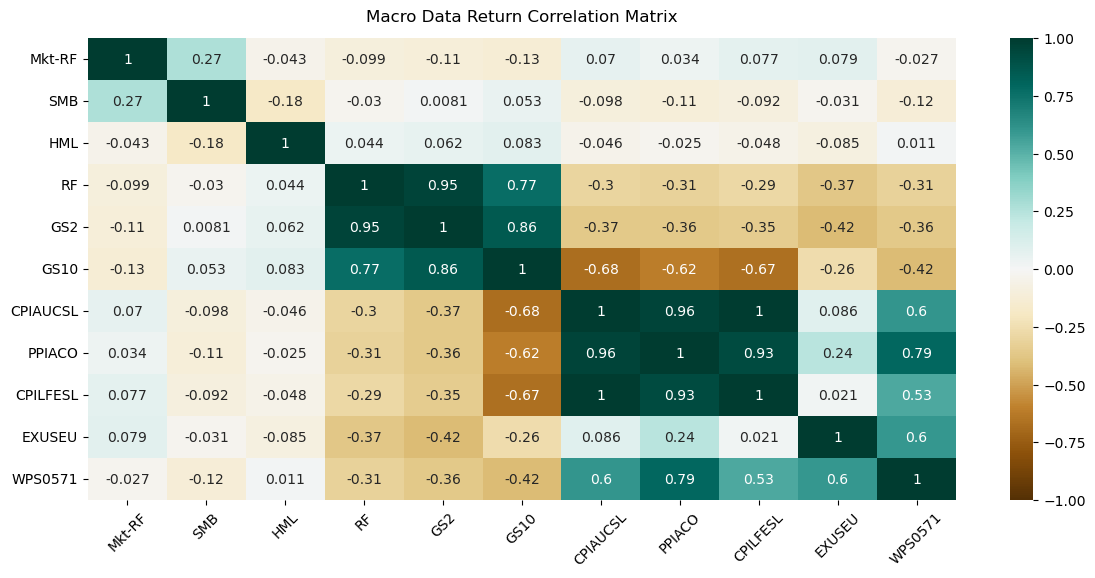

In [48]:
plt.figure(figsize=(14, 6))
corr = macro_df.corr()
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True , cmap='BrBG' )
heatmap.set_title('Macro Data Return Correlation Matrix', fontdict={'fontsize':12}, pad=12) ;
plt.xticks(rotation=45)
plt.show()

# Dealing with multicollinearity

In [49]:
macro_df['Gs_Spread'] = macro_df['GS10'] - macro_df['GS2']
macro_df = macro_df.drop(['GS10', 'GS2', 'PPIACO', 'CPIAUCSL'], axis=1)
macro_df

,Mkt-RF,SMB,HML,RF,CPILFESL,EXUSEU,WPS0571,Gs_Spread
DATE,,,,,,,,
1999-01-01,3.50,0.75,-4.60,0.35,175.600,1.1591,49.700,0.10
1999-02-01,-4.08,-6.08,1.92,0.35,175.600,1.1203,47.100,0.12
1999-03-01,3.45,-3.80,-2.74,0.43,175.700,1.0886,49.300,0.18
1999-04-01,4.33,3.91,2.46,0.37,176.300,1.0701,63.500,0.20
1999-05-01,-2.46,3.34,2.35,0.34,176.500,1.0630,61.100,0.29
...,...,...,...,...,...,...,...,...
2023-08-01,-2.39,-3.16,-1.06,0.45,309.656,1.0910,287.634,-0.73
2023-09-01,-5.24,-2.51,1.52,0.43,310.644,1.0672,302.334,-0.64
2023-10-01,-3.19,-3.87,0.19,0.47,311.390,1.0565,255.262,-0.27


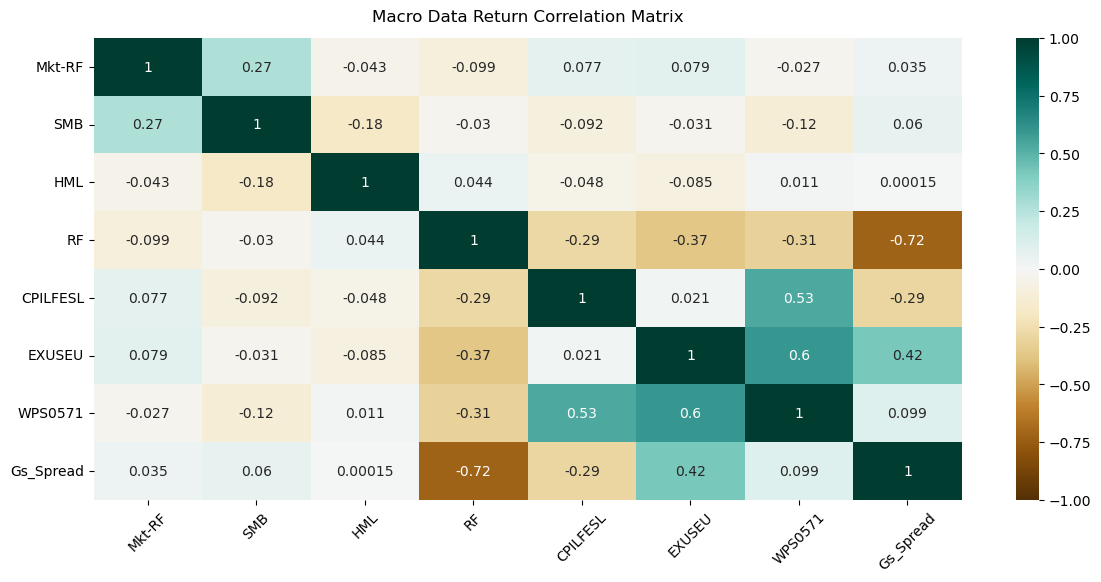

In [50]:
plt.figure(figsize=(14, 6))
corr = macro_df.corr()
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True , cmap='BrBG' )
heatmap.set_title('Macro Data Return Correlation Matrix', fontdict={'fontsize':12}, pad=12) ;
plt.xticks(rotation=45)
plt.show()

In [51]:
# Saving as excel file
macro_df.to_excel('Macro_df.xlsx', index=True)